In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import io

In [3]:
# texts_list = []
# labels_list = []

# base_dir = "C:\\Users\\1\\Desktop\\aclImdb"
# for label in ["neg", "pos"]:
#     train_dir = os.path.join(base_dir, "train")
#     train_label_dir = os.path.join(train_dir, label)
#     for file_name in os.listdir(train_label_dir):
#         if file_name[-4:] == ".txt":

#             file = io.open(os.path.join(train_label_dir, file_name), encoding="utf-8")
#             if label == "neg":
                
#                 labels_list.append(0)
#                 texts_list.append(file.read())
            
#             else:
#                 labels_list.append(1)
#                 texts_list.append(file.read())

# print(texts_list[0])
    


In [4]:
# max_len = 100
# max_texts = 10000
# num_words = 10000
# train_samples = 200
# validation_samples = 10000

# labels_tensor = np.asarray(labels_list)
# tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words)
# tokenizer.fit_on_texts(texts_list)

# sequences = tokenizer.texts_to_sequences(texts_list)
# data = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

# train_data = data[:train_samples]
# train_labels = labels_tensor[:train_samples]
# validation_data = data[train_samples: train_samples + validation_samples]
# validation_labels = labels_tensor[train_samples: train_samples + validation_samples]



In [5]:
base_dir = "C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\cats_and_dogs_dataset"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
#validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

train_datagen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)
validation_datagen = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_acc",
        patience=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath="text_model.h5",
        monitor="val_loss",
        save_best_only=True
    )
]
input_tensor = tf.keras.Input((224, 224, 3))

branch_a_layer = tf.keras.layers.Conv2D(32, (3, 3), activation="relu")(input_tensor)
branch_a_layer = tf.keras.layers.MaxPooling2D((2, 2))(branch_a_layer)
branch_a_layer = tf.keras.layers.Conv2D(32, (3, 3), activation="relu")(branch_a_layer)

branch_b_layer = tf.keras.layers.Conv2D(32, (3, 3), activation="relu")(input_tensor)
branch_b_layer = tf.keras.layers.MaxPooling2D((2, 2))(branch_b_layer)
branch_b_layer = tf.keras.layers.Conv2D(32, (3, 3), activation="relu")(branch_b_layer)

branch_concatenate_layer = tf.keras.layers.concatenate([branch_a_layer, branch_b_layer], axis=-1)
branch_top_layer = tf.keras.layers.Flatten()(branch_concatenate_layer)
branch_top_layer = tf.keras.layers.Dense(32, activation="relu")(branch_top_layer)
branch_top_layer = tf.keras.layers.Dense(1, activation="sigmoid")(branch_top_layer)

branch_model = tf.keras.Model(input_tensor, branch_top_layer)

branch_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)
bm_history = branch_model.fit_generator(
    train_datagen,
    epochs=30,
    steps_per_epoch=20,
    validation_data=validation_datagen,
    validation_steps=20
)



C:\Users\1\AppData\Local\Temp\ipykernel_7268\1787372736.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  bm_history = branch_model.fit_generator(


Epoch 1/30
20/20 [==============================] - 39s 2s/step - loss: 1932.5295 - acc: 0.5063 - val_loss: 0.6909 - val_acc: 0.5125
Epoch 2/30
20/20 [==============================] - 38s 2s/step - loss: 0.7050 - acc: 0.5128 - val_loss: 0.6930 - val_acc: 0.5156
Epoch 3/30
20/20 [==============================] - 37s 2s/step - loss: 0.6933 - acc: 0.4920 - val_loss: 0.6932 - val_acc: 0.4859
Epoch 4/30
20/20 [==============================] - 38s 2s/step - loss: 0.6932 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4859
Epoch 5/30
20/20 [==============================] - 38s 2s/step - loss: 0.6930 - acc: 0.5266 - val_loss: 0.6930 - val_acc: 0.5156
Epoch 6/30
20/20 [==============================] - 38s 2s/step - loss: 0.6931 - acc: 0.5112 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 7/30
20/20 [==============================] - 38s 2s/step - loss: 0.6928 - acc: 0.5297 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/30
20/20 [==============================] - 38s 2s/step - loss: 0.6932 - acc: 0

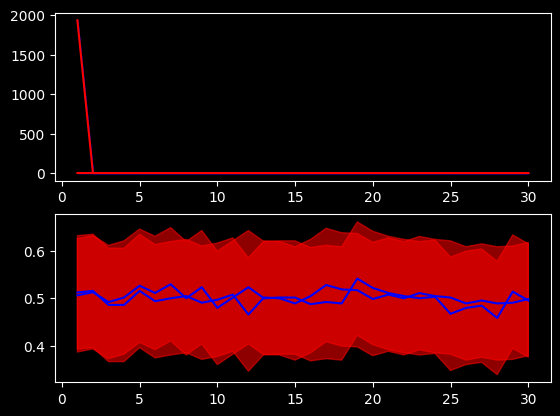

In [7]:
losses_history = [np.asarray(bm_history.history["loss"]), np.asarray(bm_history.history["val_loss"])]
acces_history = [np.asarray(bm_history.history["acc"]), np.asarray(bm_history.history["val_acc"])]
colors = [["red", "blue"], ["red", "blue"]]
labels = [["loss", "acc"], ["val_loss", "val_acc"]]

plt.style.use("dark_background")
fig, axis = plt.subplots(nrows=2)
for (loss, acc, color, label) in zip(losses_history, acces_history, colors, labels):
    
    axis[0].plot(range(1, loss.shape[0] + 1), loss, color=color[0], label=label[0])
    axis[0].fill_between(range(1, loss.shape[0] + 1), loss - 0.12, loss + 0.12, color=color[1], label=label[1], alpha=0.56)
    axis[1].plot(range(1, acc.shape[0] + 1), acc, color=color[1], label=label[1])
    axis[1].fill_between(range(1, acc.shape[0] + 1), acc - 0.12, acc + 0.12, color=colors[1], alpha=0.56)

plt.show()